In [31]:
from itertools import combinations
from os import listdir

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from SALib.analyze import sobol
from SALib.util.results import ResultDict

In [6]:
df_list = []
for file in listdir("outputs"):
    df_list.append(
        pd.read_csv(
            f"outputs/{file}",
            index_col=0,
        )
    )
df = pd.concat(df_list)

In [7]:
param_tuples = [
    ("legitimacy", [0.1, 1.0]),
    ("active_threshold", [0.0, 0.9]),
    ("reversion_rate", [0.0, 1.0]),
    ("prob_quiet", [0.0, 0.5]),
]

param_names, param_bounds = zip(*param_tuples)
param_names = list(param_names)
param_bounds = list(param_bounds)

problem = {
    "num_vars": len(param_names),
    "names": param_names,
    "bounds": param_bounds,
}

arrested = sobol.analyze(problem, df["arrested"].values, print_to_console=True)
quiet = sobol.analyze(problem, df["quiet"].values, print_to_console=True)
active = sobol.analyze(problem, df["active"].values, print_to_console=True)

/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        0.713435  0.016825
active_threshold  0.782870  0.015663
reversion_rate    0.816468  0.016628
prob_quiet        0.883603  0.018746
                        S1   S1_conf
legitimacy        0.009844  0.016316
active_threshold  0.065518  0.018581
reversion_rate    0.080473  0.018364
prob_quiet        0.132487  0.018764
                                          S2   S2_conf
(legitimacy, active_threshold)      0.153808  0.025705
(legitimacy, reversion_rate)        0.161320  0.026556
(legitimacy, prob_quiet)            0.192058  0.026616
(active_threshold, reversion_rate)  0.059222  0.027989
(active_threshold, prob_quiet)      0.083993  0.026004
(reversion_rate, prob_quiet)        0.011349  0.022840


/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        0.713933  0.013046
active_threshold  0.782242  0.016693
reversion_rate    0.816943  0.015247
prob_quiet        0.883898  0.017450
                        S1   S1_conf
legitimacy        0.010891  0.017193
active_threshold  0.065525  0.019049
reversion_rate    0.081499  0.019761
prob_quiet        0.133020  0.019593
                                          S2   S2_conf
(legitimacy, active_threshold)      0.153078  0.025181
(legitimacy, reversion_rate)        0.159710  0.027873
(legitimacy, prob_quiet)            0.191488  0.026427
(active_threshold, reversion_rate)  0.058812  0.026619
(active_threshold, prob_quiet)      0.083789  0.026078
(reversion_rate, prob_quiet)        0.010767  0.027395


/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        0.971022  0.179395
active_threshold  0.971062  0.199224
reversion_rate    0.926408  0.140208
prob_quiet        1.085733  0.221223
                        S1   S1_conf
legitimacy       -0.005378  0.014402
active_threshold  0.003766  0.014930
reversion_rate    0.024396  0.050976
prob_quiet        0.000589  0.015542
                                          S2   S2_conf
(legitimacy, active_threshold)      0.030751  0.034090
(legitimacy, reversion_rate)        0.043610  0.054621
(legitimacy, prob_quiet)            0.088343  0.064465
(active_threshold, reversion_rate)  0.052583  0.084123
(active_threshold, prob_quiet)      0.039724  0.044490
(reversion_rate, prob_quiet)        0.002070  0.065409


[0.15380837 0.16131963 0.19205787 0.05922151 0.08399309 0.01134942]
[0.15307827 0.15970992 0.19148827 0.05881188 0.08378912 0.01076694]
[0.0307508  0.04361046 0.08834312 0.05258333 0.03972367 0.00207016]


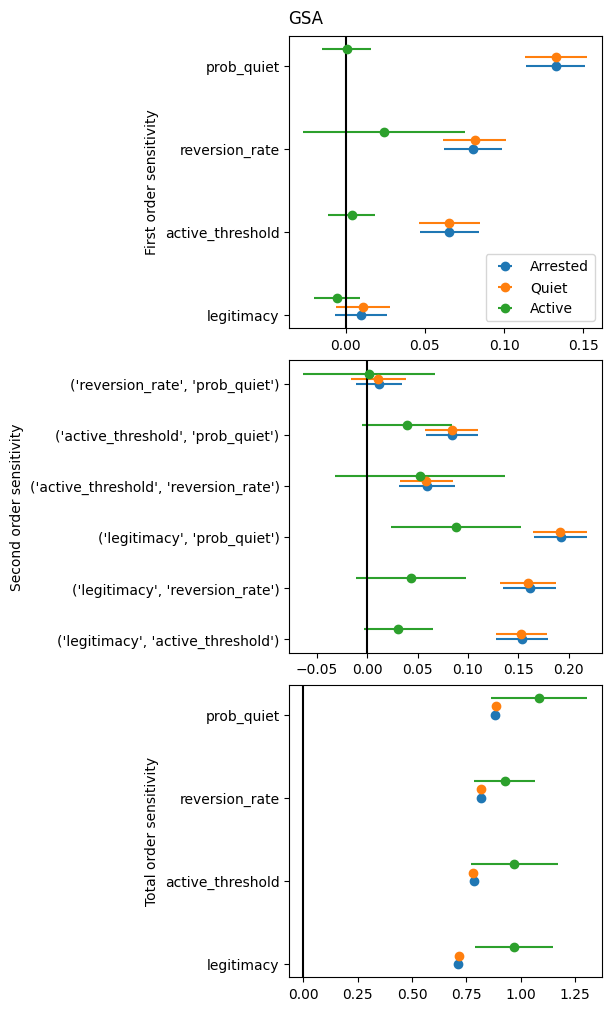

In [34]:
def plot_all_indices(analyses: dict[str, ResultDict], params, title=""):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        analyses (dict[str, ResultDict]): dictionary mapping the name of the analysis to
            dictionaries {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the names of the parameters in the analyses
        title (str): title for the plot
    """
    single_names = params
    second_names = list(combinations(params, 2))

    fig, axes = plt.subplots(3, 1, figsize=(6, 10), layout="compressed")

    for nr, analysis in enumerate(analyses.items()):
        name, s = analysis
        for i in ["1", "2", "T"]:
            # first order
            if i == "1":
                indices = s["S" + i]
                errors = s["S" + i + "_conf"]
                axes[0].errorbar(
                    indices,
                    np.arange(len(indices)) + nr * 0.1,
                    xerr=errors,
                    linestyle="None",
                    marker="o",
                    label=name,
                )
            # second order
            elif i == "2":
                flattened = s["S" + i].flatten()
                indices = flattened[~np.isnan(flattened)]
                print(f"{indices}")

                flattened = s["S" + i + "_conf"].flatten()
                errors = flattened[~np.isnan(flattened)]
                axes[1].errorbar(
                    indices,
                    np.arange(len(indices)) + nr * 0.1,
                    xerr=errors,
                    linestyle="None",
                    marker="o",
                    label=name,
                )
            # total order
            else:
                indices = s["S" + i]
                errors = s["S" + i + "_conf"]
                axes[2].errorbar(
                    indices,
                    np.arange(len(indices)) + nr * 0.1,
                    xerr=errors,
                    linestyle="None",
                    marker="o",
                    label=name,
                )

    axes[0].set_yticks(range(len(single_names)), single_names)
    axes[1].set_yticks(range(len(second_names)), second_names)
    axes[2].set_yticks(range(len(single_names)), single_names)

    axes[0].axvline(0, c="k")
    axes[1].axvline(0, c="k")
    axes[2].axvline(0, c="k")

    axes[0].set_ylabel("First order sensitivity")
    axes[1].set_ylabel("Second order sensitivity")
    axes[2].set_ylabel("Total order sensitivity")

    axes[0].legend()
    fig.suptitle(title)


plot_all_indices(
    {"Arrested": arrested, "Quiet": quiet, "Active": active}, problem["names"], "GSA"
)
plt.show()